## PHASE 2: DATA PREPROCESSING

### This is the Car Evaluation Dataset from UCI Machine Learning Repository

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import CategoricalDtype

##### Fetch the dataset from the UCI Machine Learning Repository   
Ensure that you have ucimlrepo installed. If not, install it using the following command:   
```!pip install ucimlrepo```   
Then, fetch the dataset as follows below

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

##### Creating the dataframe

In [3]:
df = pd.DataFrame(X, columns=car_evaluation.data.feature_names)
df_y = pd.DataFrame(y, columns=car_evaluation.data.target_names)
car_df = pd.concat([df, df_y], axis=1)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


##### Descriptive Statistics

In [4]:
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Check the data types of the columns

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Check for missing values and outliers

In [6]:
car_df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
for col in car_df.columns:
    print('Column:', col)
    print(car_df[col].value_counts())

Column: buying
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Column: maint
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Column: doors
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Column: persons
persons
2       576
4       576
more    576
Name: count, dtype: int64
Column: lug_boot
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Column: safety
safety
low     576
med     576
high    576
Name: count, dtype: int64
Column: class
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


Some graphs to visualize the data

Barplots

<Axes: xlabel='buying'>

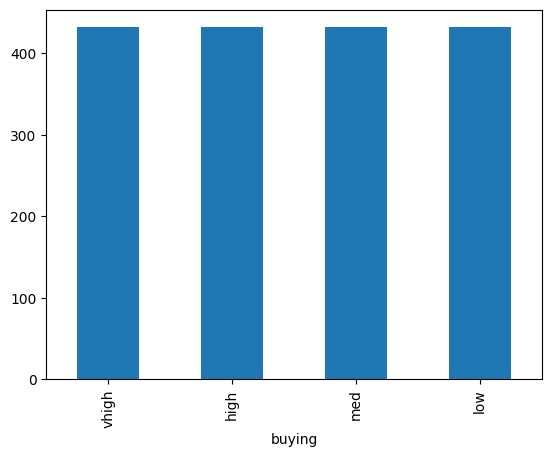

In [8]:
car_df['buying'].value_counts().plot(kind='bar')

<Axes: xlabel='maint'>

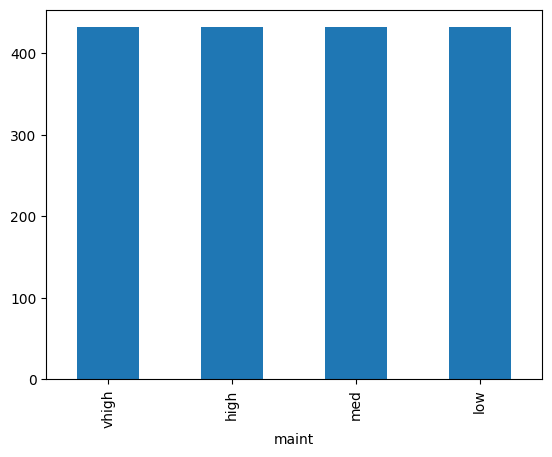

In [28]:
car_df['maint'].value_counts().plot(kind='bar')

Pie Plots

([<matplotlib.patches.Wedge at 0x294594afc90>,
 [Text(0.7778174593052024, 0.7778174593052024, '2'),
  Text(-0.7778174593052023, 0.7778174593052024, '3'),
  Text(-0.7778174593052025, -0.7778174593052023, '4'),
  Text(0.7778174593052022, -0.7778174593052025, '5more')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

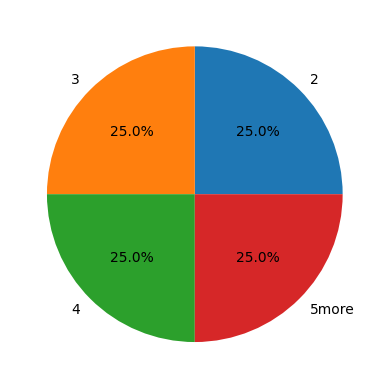

In [9]:
labels = car_df['doors'].unique()
values = car_df['doors'].value_counts() 
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x211eb2167d0>,
 [Text(0.5499999702695115, 0.9526279613277875, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '4'),
  Text(0.5500001486524352, -0.9526278583383436, 'more')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

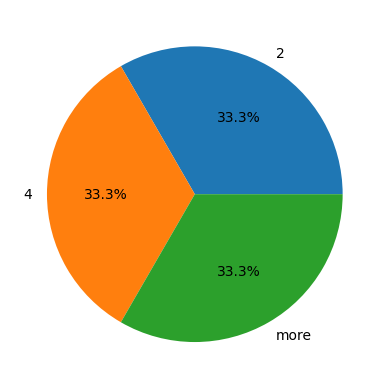

In [30]:
labels = car_df['persons'].unique()
values = car_df['persons'].value_counts() 
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

##### Categorizing the data to range from 0 to 4 depending on the number of elements in the column

In [10]:
buying = CategoricalDtype(['low', 'med', 'high', 'vhigh'], ordered=True)
maint = CategoricalDtype(['low', 'med', 'high', 'vhigh'], ordered=True)
doors = CategoricalDtype(['2', '3', '4', '5more'], ordered=True)
persons = CategoricalDtype(['2', '4', 'more'], ordered=True)
lug_boot = CategoricalDtype(['small', 'med', 'big'], ordered=True)
safety = CategoricalDtype(['low', 'med', 'high'], ordered=True)
class_ = CategoricalDtype(['unacc', 'acc', 'good', 'vgood'], ordered=True)

car_df['buying'] = car_df['buying'].astype(buying)
car_df['maint'] = car_df['maint'].astype(maint)
car_df['doors'] = car_df['doors'].astype(doors)
car_df['persons'] = car_df['persons'].astype(persons)
car_df['lug_boot'] = car_df['lug_boot'].astype(lug_boot)
car_df['safety'] = car_df['safety'].astype(safety)
car_df['class'] = car_df['class'].astype(class_)

In [11]:
car_df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [12]:
car_df['buying'] = car_df['buying'].replace({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3})
car_df['maint'] = car_df['maint'].replace({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3})
car_df['doors'] = car_df['doors'].replace({'2': 2, '3': 2, '4': 4, '5more': 5})
car_df['persons'] = car_df['persons'].replace({'2': 0, '4': 4, 'more': 5})
car_df['lug_boot'] = car_df['lug_boot'].replace({'small': 0, 'med': 1, 'big': 2})
car_df['safety'] = car_df['safety'].replace({'low': 0, 'med': 1, 'high': 2})
car_df['class'] = car_df['class'].replace({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

In [13]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,0,0,0,0
1,3,3,2,0,0,1,0
2,3,3,2,0,0,2,0
3,3,3,2,0,1,0,0
4,3,3,2,0,1,1,0


In [14]:
car_df.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000e+00,-1.356939e-15,5.315566e-16,-4.531852e-16,-1.045866e-16,-4.082114e-16,-0.282750
maint,-1.356939e-15,1.000000e+00,2.484372e-16,1.067257e-16,8.544286e-17,-7.826398e-17,-0.232422
doors,5.315566e-16,2.484372e-16,1.000000e+00,1.566020e-17,-1.053997e-17,3.089302e-17,0.056401
persons,-4.531852e-16,1.067257e-16,1.566020e-17,1.000000e+00,-1.223906e-17,6.119529e-18,0.388544
lug_boot,-1.045866e-16,8.544286e-17,-1.053997e-17,-1.223906e-17,1.000000e+00,1.927471e-18,0.157932
safety,-4.082114e-16,-7.826398e-17,3.089302e-17,6.119529e-18,1.927471e-18,1.000000e+00,0.439337
class,-2.827504e-01,-2.324215e-01,5.640130e-02,3.885444e-01,1.579317e-01,4.393373e-01,1.000000


In [22]:
categorical_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

car_df[categorical_columns] = car_df[categorical_columns].astype(str)

# Convert strings to float
car_df[categorical_columns] = car_df[categorical_columns].apply(lambda x: x.astype(float))

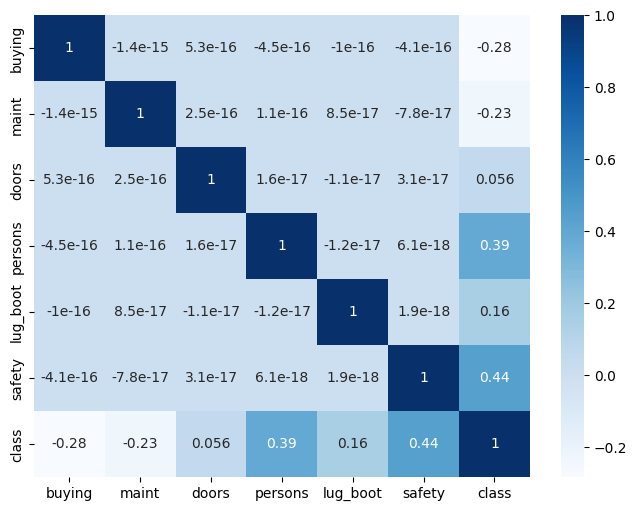

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(car_df.corr(),cmap='Blues', annot=True)
plt.show()